Step 1: Exploratory Data Analysis (EDA)

Shape of dataset: (50000, 21)


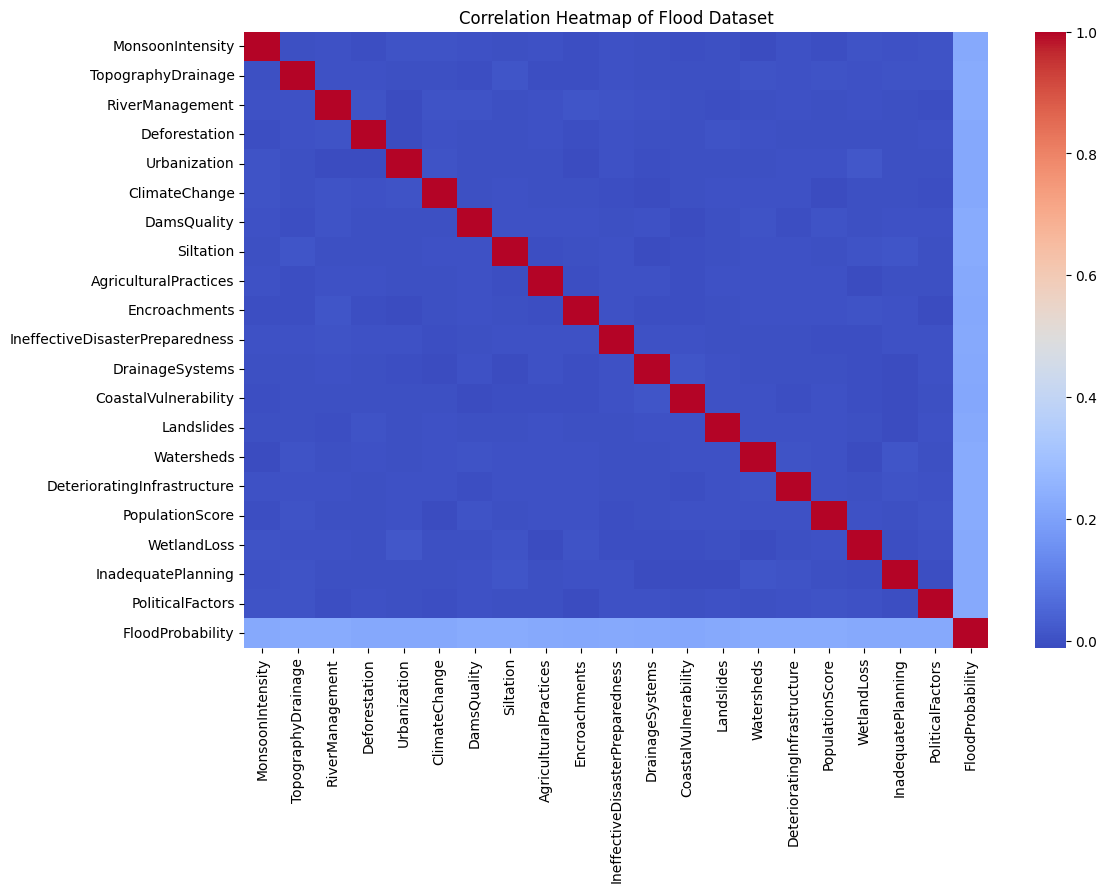

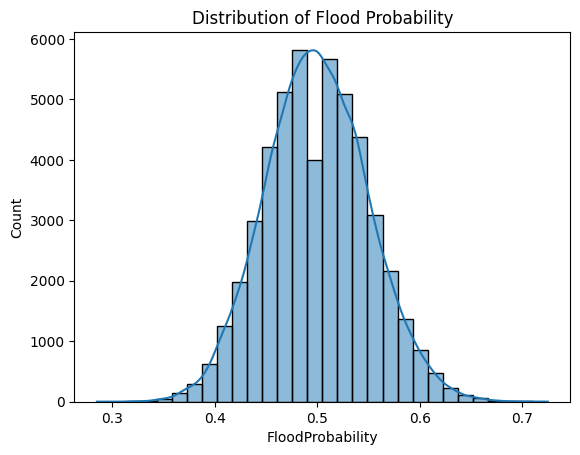

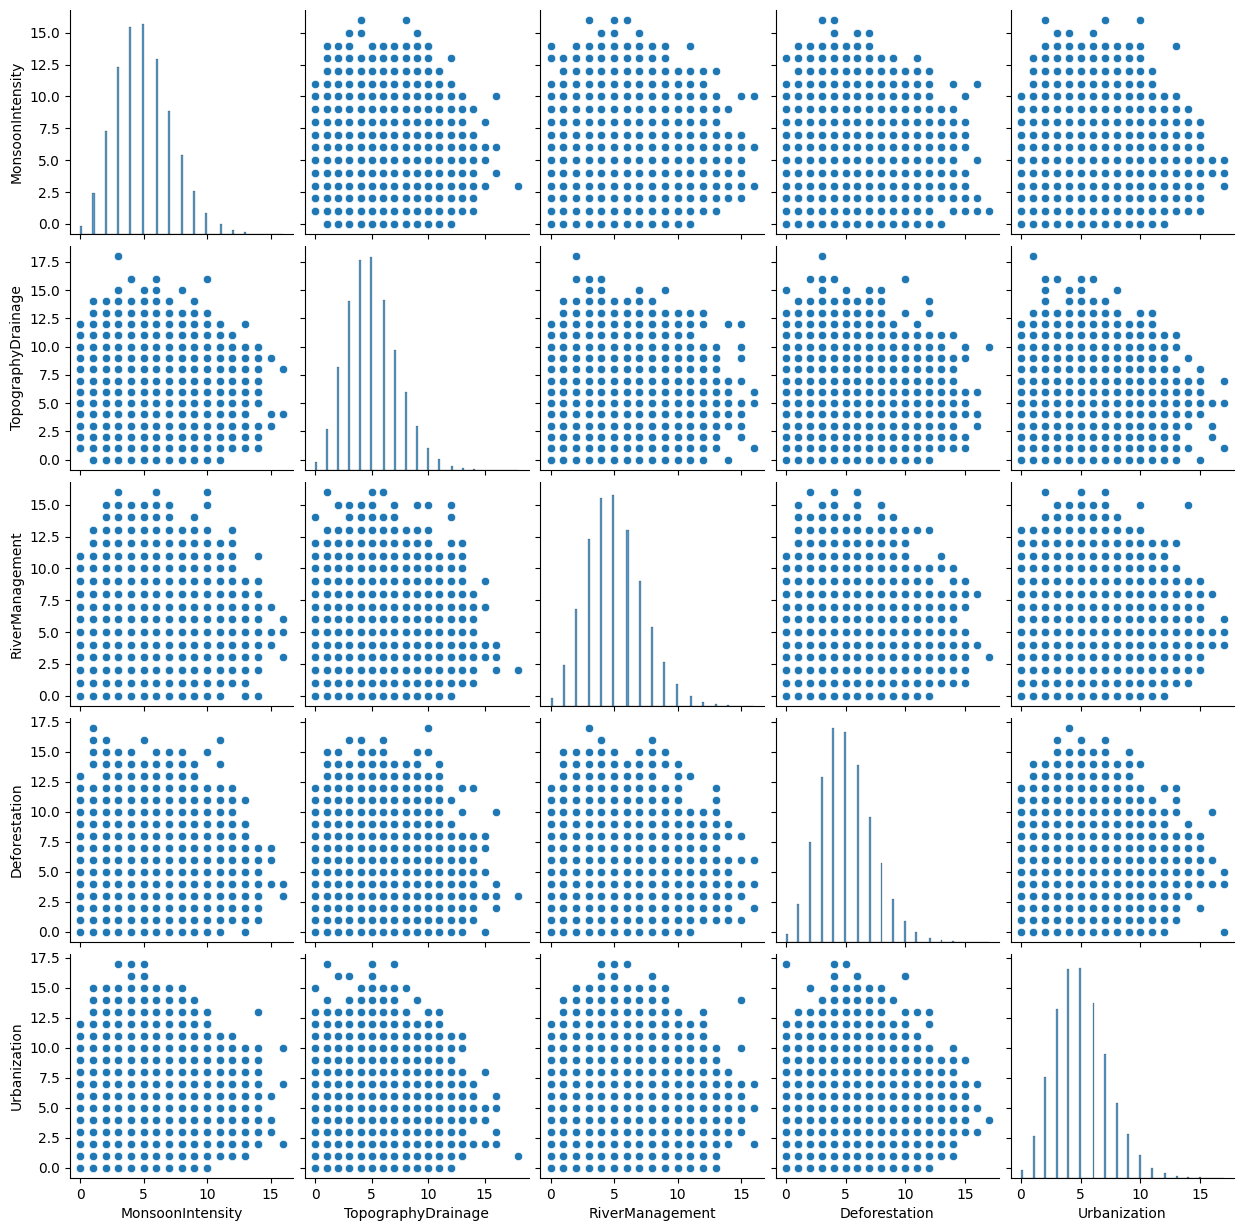

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("flood.csv")

# Check dataset shape
print("Shape of dataset:", df.shape)

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Flood Dataset")
plt.show()

# Distribution of target variable
sns.histplot(df['FloodProbability'], bins=30, kde=True)
plt.title("Distribution of Flood Probability")
plt.show()

# Pairplot for first few features
sns.pairplot(df.iloc[:, :5])
plt.show()


Step 2: Data Transformation

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop("FloodProbability", axis=1))

scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])
scaled_df["FloodProbability"] = df["FloodProbability"]

scaled_df.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0.1875,0.444444,0.3750,0.352941,0.235294,0.235294,0.3750,0.1250,0.1875,0.111111,...,0.588235,0.411765,0.2500,0.1250,0.176471,0.210526,0.136364,0.1250,0.3750,0.450
1,0.5000,0.222222,0.3125,0.411765,0.411765,0.529412,0.0625,0.3125,0.3125,0.222222,...,0.529412,0.117647,0.3750,0.1250,0.058824,0.052632,0.409091,0.0625,0.1875,0.475
2,0.1875,0.555556,0.2500,0.058824,0.411765,0.294118,0.2500,0.4375,0.2500,0.500000,...,0.411765,0.235294,0.2500,0.5000,0.352941,0.052632,0.363636,0.1875,0.3750,0.515
3,0.2500,0.222222,0.1250,0.411765,0.176471,0.235294,0.0625,0.2500,0.3750,0.222222,...,0.235294,0.117647,0.3750,0.3750,0.470588,0.421053,0.272727,0.3750,0.6250,0.520
4,0.1875,0.388889,0.3125,0.117647,0.294118,0.470588,0.3125,0.1250,0.4375,0.277778,...,0.411765,0.352941,0.3125,0.1875,0.176471,0.210526,0.181818,0.1875,0.2500,0.475


Step 3: Feature Selection

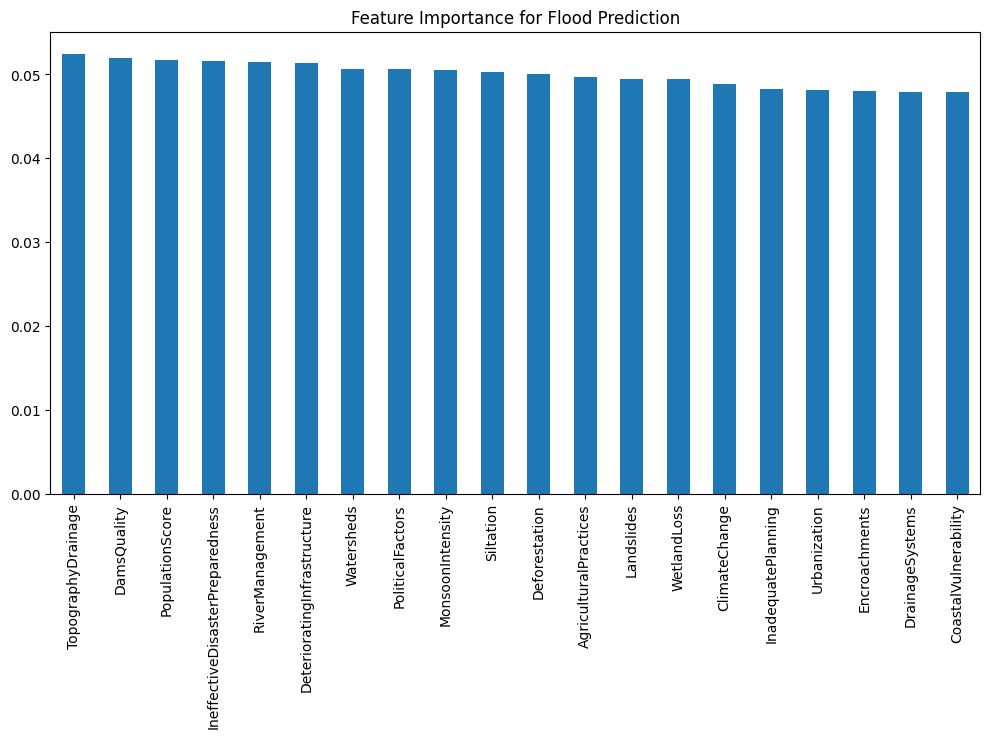

Top 5 Important Features:
 TopographyDrainage                 0.052467
DamsQuality                        0.051875
PopulationScore                    0.051727
IneffectiveDisasterPreparedness    0.051569
RiverManagement                    0.051512
dtype: float64


In [3]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop("FloodProbability", axis=1)
y = df["FloodProbability"]

# Train a simple model for feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance for Flood Prediction")
plt.show()

print("Top 5 Important Features:\n", importance.sort_values(ascending=False).head(5))
